Dataset

In [70]:
import pandas                   as pd
import numpy                    as np
from sklearn.model_selection    import train_test_split
import plotly.plotly            as py
import plotly.graph_objs        as go
from sklearn                    import base
from sklearn.pipeline           import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline           import FeatureUnion

In [71]:
properties      = pd.read_table('kddcup.names',sep=':',skiprows=1,header=None)
names           = list(properties[0])
names.append('type_of_intrusion')
X               = pd.read_table('kddcup.data.gz',header=None,sep=',')
X.columns       = names

In [72]:
y = X['type_of_intrusion']
X.drop('type_of_intrusion',axis=1,inplace=True)

In [73]:
class CST(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_name=None):
        self.col_name = col_name 
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.col_name]

In [74]:
class DictEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        result = []
        
        for i in X:
            temp = {}
            if i != None:
                temp[i] = 1
                    
            result.append(temp)
            
        return result

In [82]:
class DV(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        self.dv = DictVectorizer(sparse=False)
        result  = self.dv.fit_transform(X)
            
        return result

In [79]:
pt = Pipeline([
    ('selecting'  ,CST('protocol_type')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

sv = Pipeline([
    ('selecting'  ,CST('service')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

fl = Pipeline([
    ('selecting'  ,CST('flag')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

all_features = FeatureUnion([
        ('protocol_type',pt),
        ('service',sv),
        ('flag',fl) 
    ])

In [81]:
all_features = ['icmp', 'tcp', 'udp','IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 
                'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 
                'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 
                'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 
                'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 
                'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 
                'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 
                'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'OTH', 'REJ', 'RSTO', 'RSTOS0', 
                'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']

In [ ]:
fu      = all_features.fit_transform(X)

In [83]:
fu      = pd.DataFrame(fu,index=X_train.index,columns=all_feats)

ValueError: Shape of passed values is (84, 4898431), indices imply (80, 979686)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,test_size=0.1,random_state=0)
X_test, X_val, y_test, y_val     = train_test_split(X_test,y_test,train_size=0.5,test_size=0.5,random_state=0)
del(X,y)

In [48]:
data = [go.Bar(x=y_train.value_counts().index,y=y_train.value_counts().values)]

py.iplot(data, filename='train-bar')

In [49]:
data = [go.Bar(x=y_test.value_counts().index,y=y_test.value_counts().values)]

py.iplot(data, filename='test-bar')

In [50]:
data = [go.Bar(x=y_val.value_counts().index,y=y_val.value_counts().values)]

py.iplot(data, filename='val-bar')

In [51]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
3745425,0,tcp,private,S0,0,0,0,0,0,0,...,255,21,0.08,0.05,0.00,0.0,1.0,1.0,0.0,0.0
4535128,3269,udp,other,SF,147,105,0,0,0,0,...,255,3,0.01,0.64,0.95,0.0,0.0,0.0,0.0,0.0
2433560,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
4760347,0,tcp,private,REJ,0,0,0,0,0,0,...,255,17,0.07,0.07,0.00,0.0,0.0,0.0,1.0,1.0
971684,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0


In [52]:
pd.isnull(X_train).sum().sum()

0

In [53]:
print(X_train.iloc[0].apply(type).value_counts())
print('\n')
print(X_train.iloc[0].apply(type))

<class 'numpy.int64'>      23
<class 'numpy.float64'>    15
<class 'str'>               3
Name: 3745425, dtype: int64


duration                         <class 'numpy.int64'>
protocol_type                            <class 'str'>
service                                  <class 'str'>
flag                                     <class 'str'>
src_bytes                        <class 'numpy.int64'>
dst_bytes                        <class 'numpy.int64'>
land                             <class 'numpy.int64'>
wrong_fragment                   <class 'numpy.int64'>
urgent                           <class 'numpy.int64'>
hot                              <class 'numpy.int64'>
num_failed_logins                <class 'numpy.int64'>
logged_in                        <class 'numpy.int64'>
num_compromised                  <class 'numpy.int64'>
root_shell                       <class 'numpy.int64'>
su_attempted                     <class 'numpy.int64'>
num_root                         <class 'numpy.int64'>


In [54]:
class CST(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_name=None):
        self.col_name = col_name 
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.col_name]

In [55]:
class DictEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        result = []
        
        for i in X:
            temp = {}
            if i != None:
                temp[i] = 1
                    
            result.append(temp)
            
        return result

In [56]:
class DV(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        self.dv = DictVectorizer(sparse=False)
        result  = self.dv.fit_transform(X)
            
        return result

In [57]:
pt = Pipeline([
    ('selecting'  ,CST('protocol_type')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

sv = Pipeline([
    ('selecting'  ,CST('service')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

fl = Pipeline([
    ('selecting'  ,CST('flag')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

all_features = FeatureUnion([
        ('protocol_type',pt),
        ('service',sv),
        ('flag',fl) 
    ])

In [58]:
all_feats = ['icmp', 'tcp', 'udp','IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 
             'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 
             'gopher', 'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 
             'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 
             'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 
             'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 
             'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois','OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 
             'S3', 'SF', 'SH']

In [60]:
print(X_train.shape)
fu      = all_features.fit_transform(X_train)
print(fu.shape)
fu      = pd.DataFrame(fu,index=X_train.index,columns=all_feats)

(979686, 41)
(979686, 81)


In [61]:
len(all_feats)

80

In [43]:
fu      = all_features.fit_transform(X_train)
fu      = pd.DataFrame(fu,index=X_train.index,columns=all_feats)
X_train = pd.concat([X_train,fu],axis=1)
X_train.drop('protocol_type',axis=1,inplace=True)
X_train.drop('service',axis=1,inplace=True)
X_train.drop('flag',axis=1,inplace=True)

fu      = all_features.fit_transform(X_test)
fu      = pd.DataFrame(fu,index=X_test.index,columns=all_feats)
X_test  = pd.concat([X_test,fu],axis=1)
X_test.drop('protocol_type',axis=1,inplace=True)
X_test.drop('service',axis=1,inplace=True)
X_test.drop('flag',axis=1,inplace=True)

fu      = all_features.fit_transform(X_val)
fu      = pd.DataFrame(fu,index=X_val.index,columns=all_feats)
X_val   = pd.concat([X_val,fu],axis=1)
X_val.drop('protocol_type',axis=1,inplace=True)
X_val.drop('service',axis=1,inplace=True)
X_val.drop('flag',axis=1,inplace=True)

ValueError: Shape of passed values is (81, 979686), indices imply (80, 979686)

# Intrusion Detection Learning

## Cybersecurity

Cyber security is the set of technologies and processes designed to protect computers, networks, programs, and data from attack, unauthorized access, change, or destruction. Cyber security systems are composed of network security systems and computer (host) security systems. Each of these has, at a minimum, a firewall, antivirus software, and an intrusion detection system (IDS). IDSs help discover, determine, and identify unauthorized use, duplication, alteration, and destruction of information systems. The security breaches include external intrusions (attacks from outside the organization) and internal intrusions (attacks from within the organization).

There are three main types of cyber analytics in support of IDSs: **misuse-based** (sometimes also called signature-based), **anomaly-based**, and **hybrid**. Misuse-based techniques are designed to detect known attacks by using signatures of those attacks. They are effective for detecting known type of attacks without generating an overwhelming number of false alarms. They require frequent manual updates of the database with rules and signatures. Misuse-based techniques cannot detect novel (zero-day) attacks.

Anomaly-based techniques model the normal network and system behavior, and identify anomalies as deviations from normal behavior. They are appealing because of their ability to detect zero-day attacks. Another advantage is that the profiles of normal activity are customized for every system, application, or network, thereby making it difficult for attackers to know which activities they can carry out undetected. Additionally, the data on which anomaly-based techniques alert (novel attacks) can be used to define the signatures for misuse detectors. The main disadvantage of anomaly-based techniques is the potential for high false alarm rates (FARs) because previously unseen (yet legitimate) system behaviors may be categorized as anomalies.

Hybrid techniques combine misuse and anomaly detection. They are employed to raise detection rates of known intrusions and decrease the false positive (FP) rate for unknown attacks. An in-depth review of the literature did not discover many pure anomaly detection methods; most of the methods were really hybrid. Therefore, in the descriptions of ML and DM methods, the anomaly detection and hybrid methods are described together.

Another division of IDSs is based on where they look for intrusive behavior: network-based or host-based. A network-based IDS identifies intrusions by monitoring traffic through network devices. A host-based IDS monitors process and file activities related to the software environment associated with a specific host. [[1]](http://ieeexplore.ieee.org/document/7307098/)

## Machine Learning

An ML approach usually consists of two phases: training and testing. Often, the following steps are performed:

- Identify class attributes (features) and classes from training data.
- Identify a subset of the attributes necessary for classification (i.e., dimensionality reduction).
- Learn the model using training data.
- Use the trained model to classify the unknown data.

In reality, for most ML methods, there should be three phases, not two: training, validation, and testing. ML and DM methods often have parameters such as the number of layers and nodes for an ANN. After the training is complete, there are usually several models (e.g., ANNs) available. To decide which one to use and have a good estimation of the error it will achieve on a test set, there should be a third separate data set, the validation data set. The model that performs the best on the validation data should be the model used, and should not be fine-tuned depending on its accuracy on the test data set. Otherwise, the accuracy reported is optimistic and might not reflect the accuracy that would be obtained on another test set similar to but slightly different from the existing test set.

## Data Mining

The CRISP-DM model illustrates commonly used phases and paradigms by DM experts to solve problems. The model is composed of the following six phases:

- Business understanding: Defining the DM problem shaped by the project requirements.
- Data understanding: Data collection and examination.
- Data preparation: All aspects of data preparation to reach the final dataset.
- Modeling: Applying DM and ML methods and optimizing parameters to fit best model.
- Evaluation: Evaluating the method with appropriate metrics to verify business goals are reached.

Deployment: Varies from submitting a report to a full implementation of the data collection and modeling framework. Usually, the data analyst engages the phases until deployment, while the customer performs the deployment phase.

![alt text](image1.png)


## Dataset

Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders.  The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.


All the files were downloaded from [KDD-CUP-99](http://archive.ics.uci.edu/ml/databases/kddcup99/task.html), it contains the datasets, feature names and the task description, they are listed below.

- UserID (Doctor (type of doctor), Nurse, Administrative, other)
- PatientID (where is the patient, what is his/her illness)
- Type of connection
- Time of connection

In [20]:
!ls

KDD-CUP-99 Task Description.html
README.md
Untitled.ipynb
corrected.gz
image1.png
kdd.ipynb
kddcup.data.gz
kddcup.data_10_percent.gz
kddcup.names
kddcup.newtestdata_10_percent_unlabeled.gz
kddcup.testdata.unlabeled.gz
kddcup.testdata.unlabeled_10_percent.gz
missingdata.png
training_attack_types.txt
typo-correction.txt
yelp_exploration.ipynb


### Load training data

In [1]:
import pandas as pd
import numpy  as np

In [2]:
properties = pd.read_table('kddcup.names',sep=':',skiprows=1,header=None)
names      = list(properties[0])
names.append('target')

In [3]:
X_train         = pd.read_table('kddcup.data_10_percent.gz',header=None,sep=',')
X_train.columns = names
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


### Missing Data

It is important to think why data may be missing. Statisticians often use the terms ‘missing at random’ and ‘not missing at random’ to represent different scenarios.

Data are said to be ‘missing at random’ if the fact that they are missing is unrelated to actual values of the missing data. For instance, if some quality-of-life questionnaires were lost in the postal system, this would be unlikely to be related to the quality of life of the trial participants who completed the forms. In some circumstances, statisticians distinguish between data ‘missing at random’ and data ‘missing completely at random’, although in the context of a systematic review the distinction is unlikely to be important. Data that are missing at random may not be important. Analyses based on the available data will tend to be unbiased, although based on a smaller sample size than the original data set.

Data are said to be ‘not missing at random’ if the fact that they are missing is related to the actual missing data. For instance, in a depression trial, participants who had a relapse of depression might be less likely to attend the final follow-up interview, and more likely to have missing outcome data. Such data are ‘non-ignorable’ in the sense that an analysis of the available data alone will typically be biased. Publication bias and selective reporting bias lead by definition to data that are 'not missing at random', and attrition and exclusions of individuals within studies often do as well.

The principal options for dealing with missing data are.
- analysing only the available data (i.e. ignoring the missing data) helpful for data missing at random;
- imputing the missing data with replacement values, and treating these as if they were observed (e.g. last observation carried forward, imputing an assumed outcome such as assuming all were poor outcomes, imputing the mean, imputing based on predicted values from a regression analysis) practical in most circumstances and commonly used;
- imputing the missing data and accounting for the fact that these were imputed with uncertainty (e.g. multiple imputation, simple imputation methods (as point 2) with adjustment to the standard error);
- using statistical models to allow for missing data, making assumptions about their relationships with the available data.
 
Four general recommendations for dealing with missing data in Cochrane reviews are as follows.
- Whenever possible, contact the original investigators to request missing data.
- Make explicit the assumptions of any methods used to cope with missing data: for example, that the data are assumed missing at random, or that missing values were assumed to have a particular value such as a poor outcome.
- Perform sensitivity analyses to assess how sensitive results are to reasonable changes in the assumptions that are made. [[2]](http://handbook.cochrane.org/chapter_16/16_1_missing_data.htm)
 

![alt text](missingdata.png)

In [4]:
pd.isnull(X_train).sum().sum()

0

In [5]:
y = X_train['target']
X_train.drop('target',axis=1,inplace=True)

In [6]:
import plotly.plotly     as py
import plotly.graph_objs as go

data = [go.Bar(x = y.value_counts().index,y =y.value_counts().values)]

py.iplot(data, filename='basic-bar')

In [7]:
y_bin = []

for i in y.values:
    if i == 'smurf.' or i == 'neptune.' or i == 'normal.':
        y_bin.append(0)
    else:
        y_bin.append(1)

In [8]:
np.sum(y_bin)/len(y_bin)

0.017715846087514499

[Attack Types](https://www.ll.mit.edu/ideval/docs/attackDB.html)

Add additional classification all but smurf. neptune. normal.

### Unbalanced Data

UNBALANCED DATA TEXT HERE

### Transform Data

In [9]:
print(X_train.ix[0].apply(type))
print('\n')
print(X_train.ix[0].apply(type).value_counts())

duration                         <class 'numpy.int64'>
protocol_type                            <class 'str'>
service                                  <class 'str'>
flag                                     <class 'str'>
src_bytes                        <class 'numpy.int64'>
dst_bytes                        <class 'numpy.int64'>
land                             <class 'numpy.int64'>
wrong_fragment                   <class 'numpy.int64'>
urgent                           <class 'numpy.int64'>
hot                              <class 'numpy.int64'>
num_failed_logins                <class 'numpy.int64'>
logged_in                        <class 'numpy.int64'>
num_compromised                  <class 'numpy.int64'>
root_shell                       <class 'numpy.int64'>
su_attempted                     <class 'numpy.int64'>
num_root                         <class 'numpy.int64'>
num_file_creations               <class 'numpy.int64'>
num_shells                       <class 'numpy.int64'>
num_access

One-hot encode strings 'factor' variables

Variable selection transformer

In [10]:
from sklearn          import base
from sklearn.pipeline import Pipeline

class CST(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_name=None):
        self.col_name = col_name 
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.col_name]

Dictionary Encoder Transformer

In [11]:
class DictEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        result = []
        
        for i in X:
            temp = {}
            if i != None:
                temp[i] = 1
                    
            result.append(temp)
            
        return result

In [14]:
from sklearn.feature_extraction import DictVectorizer

class DV(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        self.dv = DictVectorizer(sparse=False)
        result  = self.dv.fit_transform(X)
        #print(self.dv.feature_names_)
            
        return result

Variable Encoding Pipeline

In [15]:
from sklearn.pipeline import FeatureUnion

pt = Pipeline([
    ('selecting'  ,CST('protocol_type')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

sv = Pipeline([
    ('selecting'  ,CST('service')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

fl = Pipeline([
    ('selecting'  ,CST('flag')),
    ('encoding'   ,DictEncoder()),
    ('vectorizing',DV()),
    ])

all_features = FeatureUnion([
        ('protocol_type',pt),
        ('service',sv),
        ('flag',fl) 
    ])

Feature Union

In [16]:
all_feats = ['icmp', 'tcp', 'udp','IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 
             'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 
             'gopher', 'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 
             'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 
             'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 
             'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 
             'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois','OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 
             'S3', 'SF', 'SH']

In [17]:
fu = all_features.fit_transform(X_train)
fu = pd.DataFrame(fu,index=X_train.index,columns=all_feats)
X_train = pd.concat([X_train,fu],axis=1)
X_train.drop('protocol_type',axis=1,inplace=True)
X_train.drop('service',axis=1,inplace=True)
X_train.drop('flag',axis=1,inplace=True)

In [18]:
X_train = pd.concat([X_train,fu],axis=1)

In [19]:
X_train.drop('protocol_type',axis=1,inplace=True)
X_train.drop('service',axis=1,inplace=True)
X_train.drop('flag',axis=1,inplace=True)

### Visualization / Reduction

In [20]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,181,5450,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train_2 = X_train.ix[pd.Series(y_bin)==1]
y_2       = y.ix[pd.Series(y_bin)==1]

lda           = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train_2.values,y_2.values)

y_2_n   = []
classes = np.unique(y_2)
ran = pd.Series(range(len(classes)))

for i in y_2:
    y_2_n.append(list(ran.ix[classes==i])[0])

/Users/luiscastro/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning:

Variables are collinear.



In [26]:
data        = []
X_train_lda = pd.DataFrame(X_train_lda)
y_2         = pd.Series(y_2)

for i in ran:
    temp = X_train_lda.ix[y_2.values==classes[i]]
    data.append(
        go.Scatter3d(
        x      = temp[0].values,
        y      = temp[1].values,
        z      = temp[2].values,
        mode   = 'markers',
        name   = classes[i],
        marker = dict(
            size    = 8,
            color   = i,
            opacity = 0.7,
            line    = dict(
            color   = i,
            width   = 0.1
            )

        ),
        )
    ) 
    
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

## Classification
### Feature Selection

In [89]:
from sklearn.feature_selection import SelectFromModel, f_classif, mutual_info_classif, SelectKBest
from sklearn.ensemble          import ExtraTreesClassifier as ETC
from sklearn.feature_selection import VarianceThreshold as VT

selector = VT()
newX     = selector.fit_transform(X_train_2)

def feature_selection(model,train,target):
    side = train.shape[1]
    predictions = pd.DataFrame(data=np.zeros(shape=(side,1)),columns=['m_i_class'],index=range(1,side+1))  
    
    for i in range(1,side+1):
        clf_m = SelectKBest(mutual_info_classif,k=i)
        clf_m.fit(train,target)
        df_m  = clf_m.transform(train)

        clf                            = model
        clf.fit(df_m,target)
        pred                           = clf.predict(df_m)
        predictions['m_i_class'].ix[i] = np.mean(pred==target)
        
    return predictions

In [90]:
predictions = feature_selection(ETC(random_state=0,n_jobs=2),newX,y_2.values)

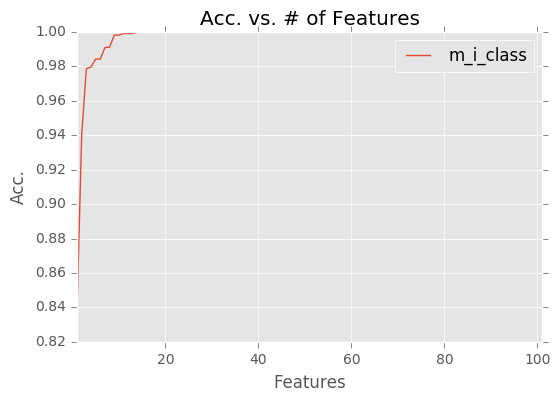

In [91]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

predictions.plot()
plt.xlabel('Features')
plt.ylabel('Acc.')
plt.title('Acc. vs. # of Features')
plt.show()

In [64]:
clf_m = SelectKBest(mutual_info_classif,k=11)
clf_m.fit(X_train_2,y_2.values)
c_m   = list(X_train_2.columns[clf_m.get_support(True)])
df_m  = clf_m.transform(X_train_2)

In [65]:
c_m

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'rerror_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [84]:
parameters = {'n_estimators':[10,50,100],'max_depth':[5,10,15]}
clf        = ETC(random_state=0,n_jobs=2)
acc_scorer = make_scorer(accuracy_score,greater_is_better=False)
grid_obj   = GridSearchCV(clf,parameters,scoring=acc_scorer,cv=3)
grid_obj   = grid_obj.fit(X_train_2[c_m],y_2.values)
clf        = grid_obj.best_estimator_

print(grid_obj.best_score_)
print(grid_obj.best_params_)

/Users/luiscastro/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning:

The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.



-0.835123400366
{'n_estimators': 10, 'max_depth': 5}


In [80]:
X_train_2.shape

(8752, 118)

In [81]:
newX.shape

(8752, 101)